In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# %matplotlib inline
linestyles = ['-','--',':','-.']

def E(XY,g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i,y_j) * f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set,f_XY = XY
    mean_X = E(XY,lambda x,y:x)
    mean_Y = E(XY, lambda x,y:y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x,y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k,y) for x_k in x_set])

### 합의 분포
- 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n의 합 X_i = X_1,X_2,...,X_n$ 이 따르는따르는 확률분포를 의미
- 합의 분포를 이해하면 확률변수의 합을 나눈 표본평균의 분포도 쉽게 이해할 수 있음

In [5]:
# 정규분포의 합의 분포
# 서로 독립인 X ~ N(1,2), Y ~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따름
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample 

print('평균:', np.mean(X_sample),np.mean(Y_sample))
print('분산:', np.var(X_sample),np.var(Y_sample))
print('합의 평균,분산:',np.mean(sum_sample), np.var(sum_sample))

평균: 0.9992956870559814 2.0005486922506432
분산: 1.995890583892915 2.999592592338641
합의 평균,분산: 2.9998443793066256 4.995360369810985


재생성 : 동일한 분포를 따르는 2개의 독립인 확률변수에 대해서 그 합도 동일한 확률분포가 되는 성질

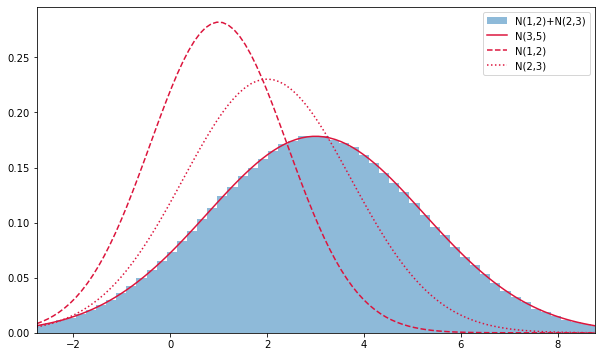

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm(3,np.sqrt(5))
xs = np.linspace(rv.isf(0.995),rv.isf(0.005),100)

ax.hist(sum_sample, bins = 100, density=True,
       alpha=0.5,label='N(1,2)+N(2,3)')
ax.plot(xs,rv.pdf(xs),label= 'N(3,5)',color='crimson')
ax.plot(xs,rv1.pdf(xs),label= 'N(1,2)',ls = '--',color='crimson')
ax.plot(xs,rv2.pdf(xs),label= 'N(2,3)',ls = ':',color='crimson')
ax.legend()

ax.set_xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()

### 포아송 분포와 합의 분포
- 서로 독립인 X - Poi(3)과 X - Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따르고 X + Y - Poi(7)이 된다.
- n개의 포아송 분포의 합이 되더라도 재생성에 의하여 포아송 분포를 따른다.

In [7]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample 

print('평균:', np.mean(X_sample),np.mean(Y_sample))
print('분산:', np.var(X_sample),np.var(Y_sample))
print('합의 평균,분산:',np.mean(sum_sample), np.var(sum_sample))

평균: 3.002411 3.999233
분산: 3.0121671870789988 4.009864411710999
합의 평균,분산: 7.001644 7.033325297263997


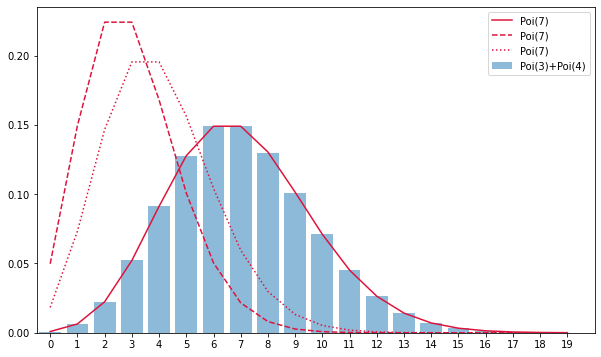

In [8]:
# 서로 독립인 n개의 확률변수가 포아송 분포에 대하여 그 합도 재생성에 의해 포아송 분포의 형태를 유지
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.poisson(7)
xs = np.arange(20)
hist,_=np.histogram(sum_sample,bins=20,range=(0,20),density= True)

ax.bar(xs,hist,alpha=0.5,label='Poi(3)+Poi(4)')
ax.plot(xs,rv.pmf(xs),label= 'Poi(7)',color='crimson')
ax.plot(xs,rv1.pmf(xs),label= 'Poi(7)',ls = '--',color='crimson')
ax.plot(xs,rv2.pmf(xs),label= 'Poi(7)',ls = ':',color='crimson')

ax.legend()
ax.set_xlim(-0.5,20)
ax.set_xticks(np.arange(20))
plt.show()

### 베르누이 분포의 합의 분포
- 베르누이 분포에는 재생성이 없다.
- 베르누이 분포의 합은 이항분포가 되는 성질이 있다.

In [9]:
# 성공 확률이 0.3인 베르누이 분포를 따르는 확률변수 10개에 대하여 백만번 표본을 추출하여 표본평균과
# 표본분산을 산출
# 표본 데이터가 하나이면 베르누이분포가 되고 표본 데이터가 여럿이면 이항 분포가 된다
np.random.seed(0)
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
Xs_sample = rv.rvs((10,sample_size))
print('표본 추출:',Xs_sample.shape,'\n','첫번째 열:', Xs_sample[:,0],'\n')
sum_sample = np.sum(Xs_sample,axis=0)
print('성공횟수:', sum_sample,'\n')
print('성공 횟수의 평균, 분산:',np.mean(sum_sample), np.var(sum_sample,ddof=1))

표본 추출: (10, 1000000) 
 첫번째 열: [0 0 1 0 0 1 0 1 0 1] 

성공횟수: [4 5 4 ... 5 5 1] 

성공 횟수의 평균, 분산: 3.001153 2.1007397713307716


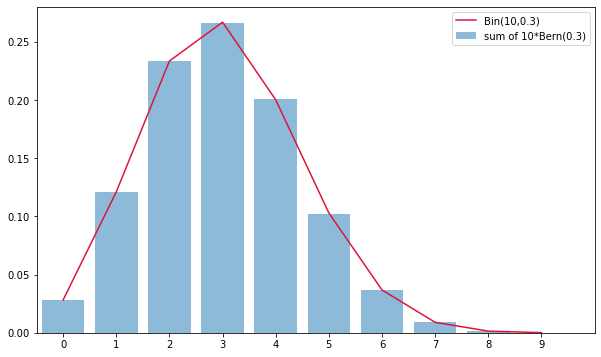

In [10]:
# 상위버전에서는 density를 사용하니 그냥 density를 쓰면 될것같다.
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.binom(10,p)
xs = np.arange(10)
hist,_=np.histogram(sum_sample,bins=10,range=(0,10),density= True)

ax.bar(xs,hist,alpha=0.5,label='sum of 10*Bern(0.3)')
ax.plot(xs,rv.pmf(xs),label= 'Bin(10,0.3)',color='crimson')

ax.legend()
ax.set_xlim(-0.5,10)
ax.set_xticks(np.arange(10))
plt.show()

### 표본 평균의 분포
- 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...X_n$의 표본평균이 따르는 분포
- 이 분포는 중심극한정리나 대수의 법칙 등 추축통계에서 중요한 성질을 담고 있기 때문에 유의해야 함 
$E(\bar{X}) = \mu$ <br>
$V(\bar{X}) = {\sigma}^2 / n$  

In [11]:
# 정규분포의 표본평균 분포
mean = 1
var = 2
rv = stats.norm(mean,np.sqrt(var))

n = 10
sample_size = int(1e6)
X_sample = rv.rvs((n, sample_size))
print('표본 사이즈 10, 표본 개수 1000000:', X_sample.shape,'\n')
sample_mean = np.mean(X_sample, axis=0)
print('표본평균 백만개:', sample_mean, len(sample_mean),'\n')
print('표본평균 백만개의 평균, 분산:', np.mean(sample_mean),np.var(sample_mean))

표본 사이즈 10, 표본 개수 1000000: (10, 1000000) 

표본평균 백만개: [1.26301629 0.73094529 1.48186978 ... 1.78129977 1.12365901 0.00466411] 1000000 

표본평균 백만개의 평균, 분산: 1.0003269102347059 0.19984666025029627


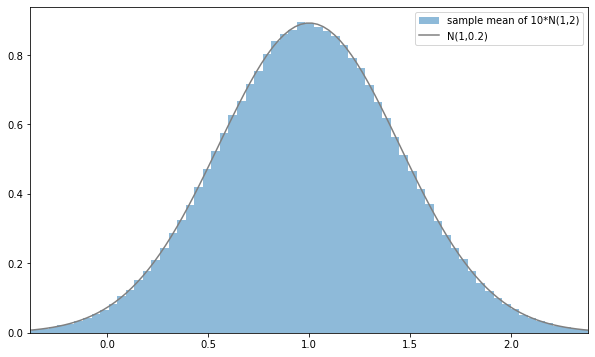

In [12]:
plt.figure(figsize=(10,6))
rv_true = stats.norm(mean,np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001),100)
plt.hist(sample_mean, bins=100, density=True, alpha=0.5,label='sample mean of 10*N(1,2)')
plt.plot(xs,rv_true.pdf(xs), label='N(1,0.2)', color='gray')
plt.legend()
plt.xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

In [18]:
# [과제] 포아송 분포의 표본평균 분포는 포아송 분포를 따르지 않고 좌우대칭인 정규분포에 근사한 형태되는 것을 입증
l = 3
rv = stats.poisson(l)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample,axis=0)

np.mean(sample_mean),np.var(sample_mean)

(2.9998144000000004, 0.2998342455526401)

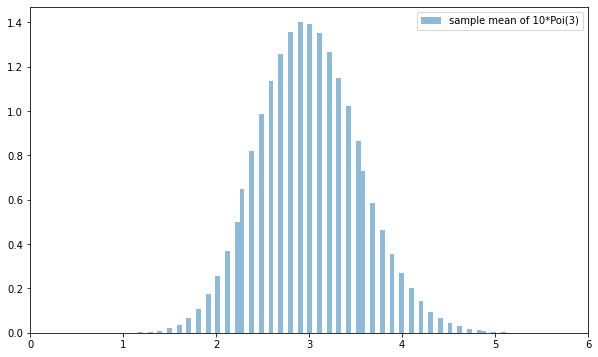

In [20]:
plt.figure(figsize=(10,6))

plt.hist(sample_mean, bins=100, density=True, alpha=0.5,label='sample mean of 10*Poi(3)')

plt.legend()
plt.xlim(0,6)
plt.show()

### 합의 분포와 표본평균의 분포
- 포아송 분포나 정규분포 같은 재생성이 있는 일부 확률분포를 제외하면 합의 분포가 어떤 형태를 보이는지 일반적으로 알수 없다.
- 표본평균의 분포가 되면 재생성을 지닌 포아송 분포 조차도 그 형태를 유지할 수 없다.
- 원래 분포가 무엇이었든지 간에 표본평균의 분포는 정규분포에 근사한다

### 중심 극한 정리
- 확률변수 $X_1,X_2....X_n$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$인 확률 분포를 따를때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N({\mu,{\sigma}^2/n})$에 가까워 진다

In [14]:
# [과제] 중심극한정리를 입증하세요
l = 3
rv = stats.poisson(l)

n = 1000
sample_size = 10000
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample,axis=0)

rv_true = stats.norm(l,np.sqrt(1/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001),100)

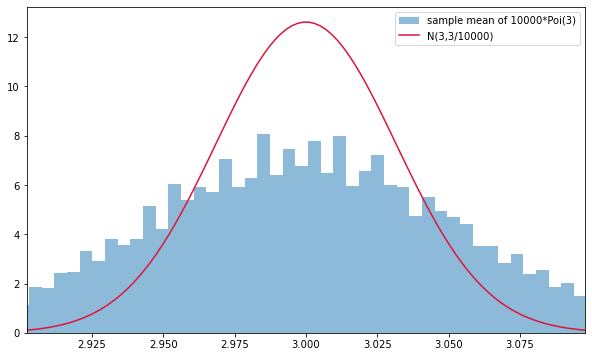

In [15]:
plt.figure(figsize=(10,6))

plt.hist(sample_mean, bins=100, density=True, alpha=0.5,label='sample mean of 10000*Poi(3)')
plt.plot(xs,rv_true.pdf(xs), label='N(3,3/10000)', color='crimson')

plt.legend()
plt.xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()

### 대수의 법칙
- 확률변수 $X_1,X_2....X_n$이 서로 독립이고 기댓값이 $\mu, 분산이 {\sigma}^2$일 것 같은 확률분포를 따를때 n이 커짐에 따라 표본평균 $\mu$ 에 수렴한다.

In [23]:
# [과제] sample_size의 변화에 따라 표본평균이 모평균에 수렴함을 입증하세요
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
plot_list = np.array([np.mean(sample[:sp],axis=0) for sp in space]).T

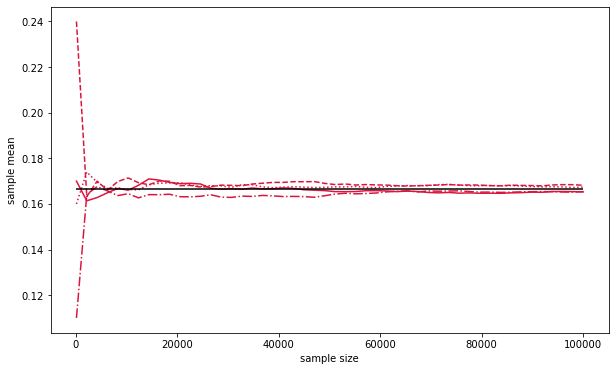

In [29]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

for pl, ls in zip(plot_list,linestyles):
    ax.plot(space,pl,ls=ls,color = 'crimson')
ax.hlines(p,-1,n,'k')
ax.set_xlabel('sample size')
ax.set_ylabel('sample mean')

plt.show()